# Exploratory Data Analysis Notebook

## Introduction


In this notebook, we will explore the Ames housing data which contains information about the sale of individual residential properties in Ames, Iowa.

The major steps involved in this exploratory data analysis are as follows:

- Importing Libraries and Setting Style
- Loading Data
- Data Inspection
- Exploring Distribution of Target
- Individual Features Exploration based on Domain Intuition
- Data-Driven Correlation Analysis
- Enhanced Relationship Exploration
- Correlation Analysis
- Outlier Management
- Missing Data Analysis
- Feature Engineering Suggestions
- Multicollinearity Check
- Feature Distribution Transformation
- Target Variable Transformation
- Statistical Tests
- Outlier Treatment Recommendations
- Temporal Analysis
- Summary and Recommendations


This process will allow us to better understand the data and determine what preprocessing and feature engineering need to be done before modeling.

## Importing Libraries and Setting Style

First, we import the necessary libraries for our analysis: `pandas` for data manipulation, `numpy` for numerical operations, `matplotlib` for basic plotting, and `seaborn` for more advanced visualization.

We also set the color palette to a pastel one and the style to `whitegrid` using `seaborn`.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Loading Data

We start by reading in the training and test datasets using `pandas`'s `read_csv()` function. The `train_df` and `test_df` dataframes are created to store the data from the corresponding CSV files.

We then print the shapes of the two dataframes to check the number of rows and columns in each. The `train_df` dataframe contains X rows and Y columns, while the `test_df` dataframe contains A rows and B columns.

Finally, we print the number of rows in the training and test datasets using `len()`. The training dataset contains training rows, while the test dataset contains test rows.



In [2]:
train_df = pd.read_csv('../data_details/train.csv')
test_df = pd.read_csv('../data_details/test.csv')

print(train_df.shape)
print(test_df.shape)


print(f"Training rows: {len(train_df)}") 
print(f"Test rows: {len(test_df)}")

(1460, 81)
(1459, 80)
Training rows: 1460
Test rows: 1459


## Data Inspection

To get a better understanding of our data, we inspect the first few rows, last few rows, and a random sample of the `train_df` dataframe using the `head()`, `tail()`, and `sample()` functions, respectively. These functions allow us to quickly view the data and check for any obvious issues or anomalies.

The `head()` function displays the first few rows of the dataframe, while the `tail()` function displays the last few rows. The `sample()` function displays a random sample of rows from the dataframe.

By inspecting the data, we can get a sense of the variables and their values, as well as any missing data or other issues that may need to be addressed during preprocessing.


In [3]:
# Data inspection

print(train_df.head())
print(train_df.dtypes) 


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [4]:
print(train_df.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
null_counts = train_df.isnull().sum()
print(null_counts[null_counts > 0])

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


## Exploring Distribution of Target


We plot a histogram of the target variable - variable we want to predict - SalePrice to understand its distribution. This helps us determine appropriate models and transformations later on.

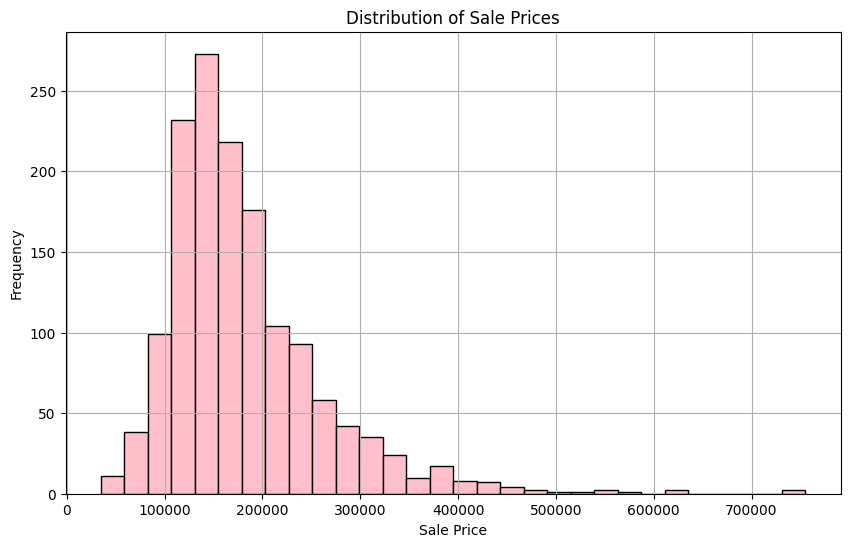

In [6]:
plt.figure(figsize=(10,6))
plt.hist(train_df['SalePrice'], bins=30, color='pink', edgecolor='black')
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()




## Individual Features Exploration
After reading our dataset description file, we want to explore understanding individual features characteristics before diving deeper into their relationships with the target variable, SalePrice. The goal is to gain a foundational understanding of the dataset's key features.

Numerical Features: We begin with GrLivArea, TotalBsmtSF, 1stFlrSF, and MasVnrArea for exploration.

Why?

- GrLivArea (Above ground living area) is intuitively a significant determinant of a house's price. Larger houses typically cost more.


- TotalBsmtSF (Total square feet of basement area) can give insights into houses with and without basements and the typical size of basements. A good quality basement with a large area could add significant value to the property.


- 1stFlrSF (First Floor square feet) provides an understanding of the house's main level size in square feet. Larger main areas are likely to increase the property price.


- MasVnrArea (Masonry veneer area) offers information on the extra finish of houses. If the masonry veneer is considered desirable, it could increase the property value.

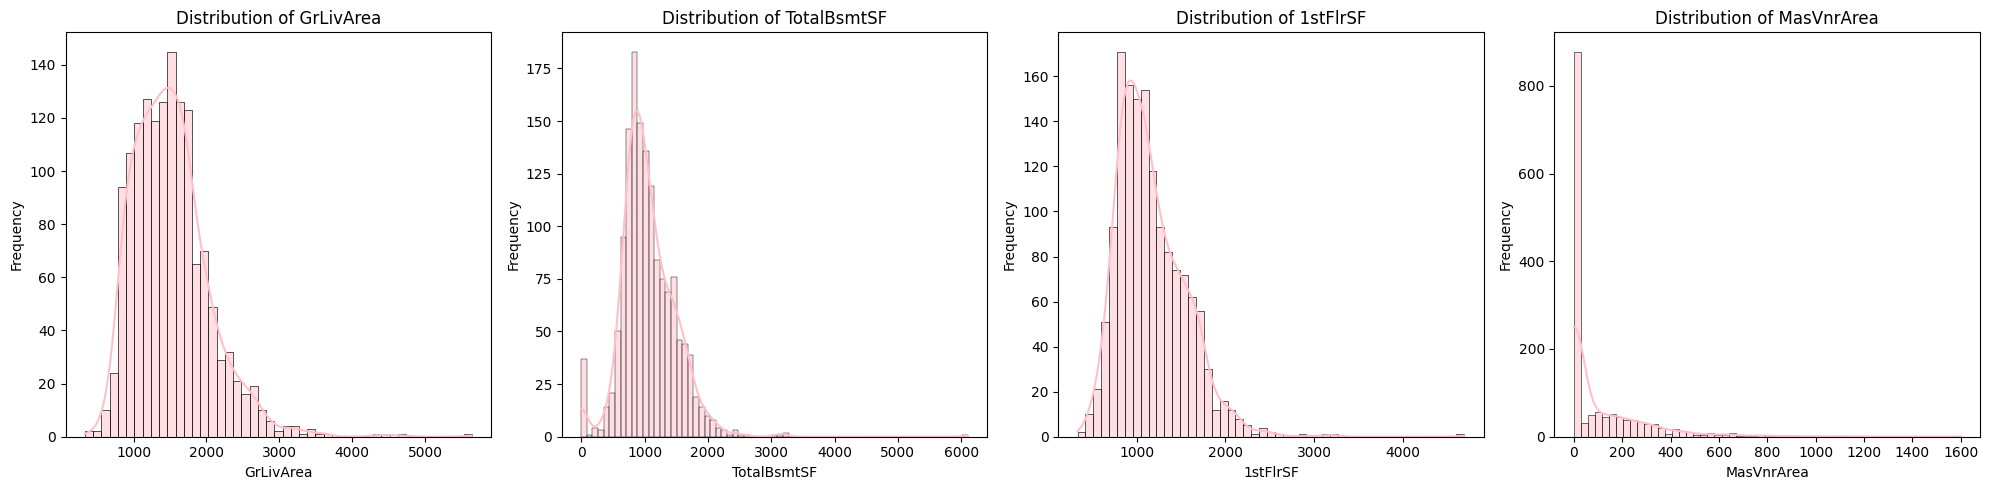

GrLivArea      1.366560
TotalBsmtSF    1.524255
1stFlrSF       1.376757
MasVnrArea     2.669084
dtype: float64

In [7]:
# Numerical features for distribution analysis
numerical_features = ['GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'MasVnrArea']

# Plotting the distribution of the selected numerical features
plt.figure(figsize=(20, 5))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, 4, i)
    sns.histplot(train_df[feature], kde=True, color='pink')  # Set color to pink
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Checking skewness of the selected features
skewness = train_df[numerical_features].skew()

skewness

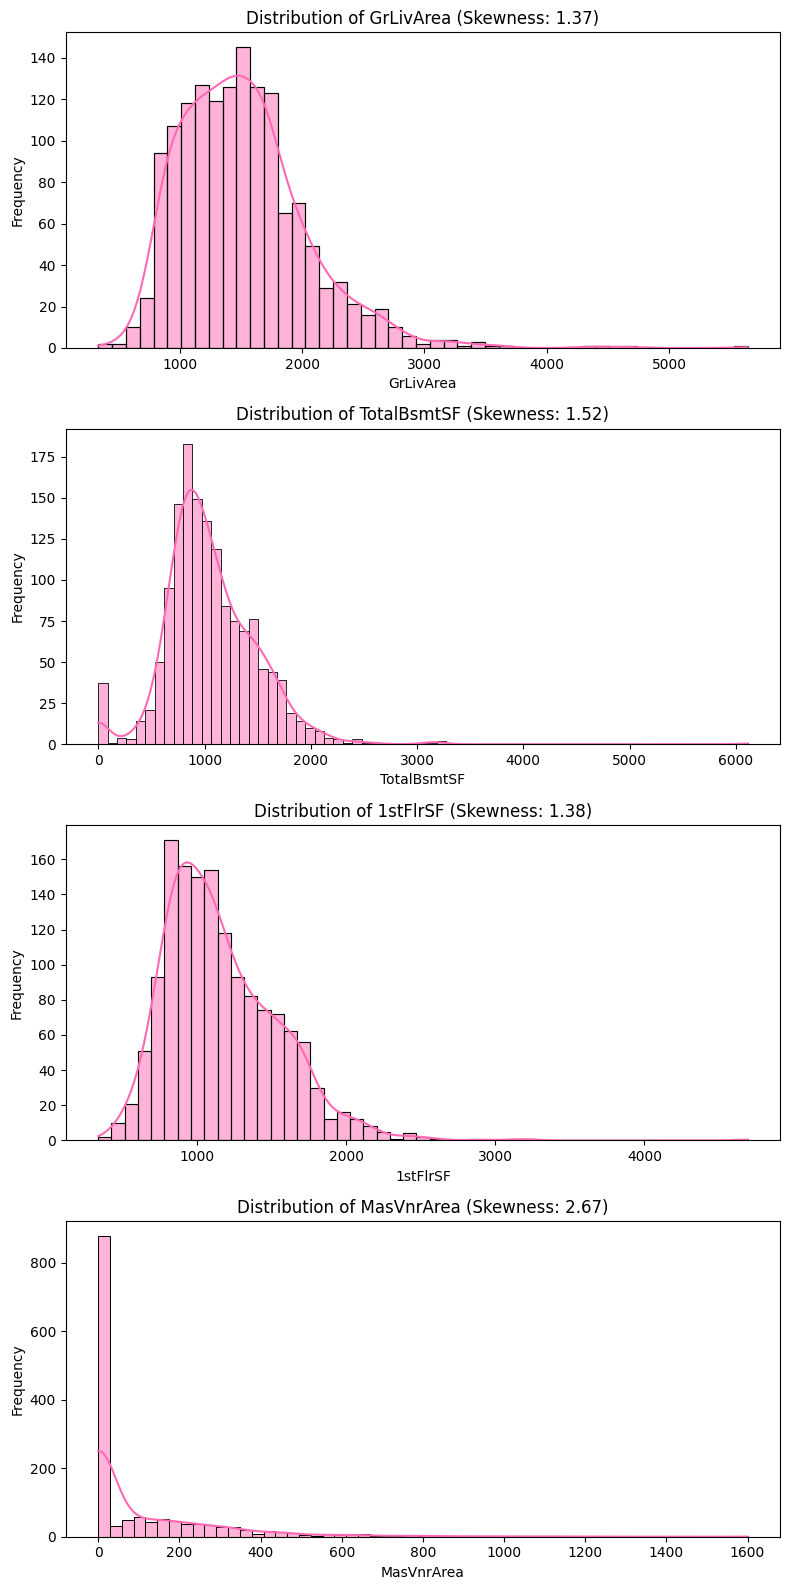

In [8]:
# List of numerical features to explore
features_to_explore = ['GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'MasVnrArea']

# Setting up the figure
fig, axs = plt.subplots(nrows=len(features_to_explore), figsize=(8, 4*len(features_to_explore)))

# Plotting the distribution and checking skewness for each feature
for i, feature in enumerate(features_to_explore):
    sns.histplot(train_df[feature].dropna(), ax=axs[i], kde=True, color='#FF69B4')  # Bright pink color
    axs[i].set_title(f'Distribution of {feature} (Skewness: {train_df[feature].skew():.2f})')
    axs[i].set_ylabel('Frequency')
    axs[i].set_xlabel(feature)

plt.tight_layout()
plt.show()

The skewness value of 1.37 and distribution of `GrLivArea` shows there are more houses with smaller living areas, and the tail of the distribution extends towards larger living areas. This indicates the presence of larger or more spacious houses as being rare - outliers.

The skewness value of 1.524255 of `TotalBsmtSF` indicates that the distribution of the total basement area of the houses is also right-skewed. Like `GrLivArea`, this suggests that there are more houses with smaller basement areas, and the tail of the distribution extends towards larger basement areas. Outliers in this case could represent houses with larger or more extensive basements.

With a skewness value of 1.376757, the distribution of the first-floor area of the houses, `1stFlrSF` is right-skewed as well. This reveals that there are more houses with smaller first-floor areas, and the tail of the distribution extends towards larger first-floor areas. Outliers  represent houses with larger or more spacious first floors.

For `MasVnrArea`, the high skewness value of 2.669084 indicates that the distribution of the masonry veneer area of the houses is significantly right-skewed. This suggests that there are more houses with smaller masonry veneer areas, and the tail of the distribution extends towards larger veneer areas. Outliers in this case could represent houses with larger or more extensive masonry veneer. The histogram for MasVnrArea showed a significant bar at the value 0, suggesting many houses don't have a masonry veneer area. The few houses that do have a masonry veneer area are mostly clustered in the smaller range, making the distribution right-skewed.

Neighborhood: Represents the physical locations within Ames city limits. There are 25 unique neighborhoods.

ExterQual: Evaluates the quality of the material on the exterior. Values include Good (Gd), Average/Typical (TA), Excellent (Ex), and Fair (Fa).
Foundation: Describes the type of foundation of the property. Types include Poured Concrete (PConc), Cinder Block (CBlock), Brick & Tile (BrkTil), Wood (Wood), Slab (Slab), and Stone (Stone).

SaleCondition: Describes the condition of sale. Values include Normal, Abnormal (Abnorml), Home not completed when last assessed (Partial), Adjoining Land Purchase (AdjLand), Allocation - two linked properties with separate deeds (Alloca), and Sale between family members (Family).

In [9]:
# Categorical features for unique values analysis
categorical_features = ['Neighborhood', 'ExterQual', 'Foundation', 'SaleCondition']
unique_values = {feature: train_df[feature].unique() for feature in categorical_features}

## Data-Driven Correlation Analysis

Following our intuitive features exploration to gain insights. We can proceed with the data-driven correlation analysis to ensure that we capture the most relevant numerical features based on actual data relationships. This combined approach ensures a comprehensive understanding from both a domain perspective and a data-driven perspective.

In [10]:
# get the correlation of numerical variables
correlation = train_df.select_dtypes(include=[np.number]).corr()

# sort the correlations of the features with SalePrice
print("Correlation with SalePrice:")
correlation['SalePrice'].sort_values(ascending=False)


Correlation with SalePrice:


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

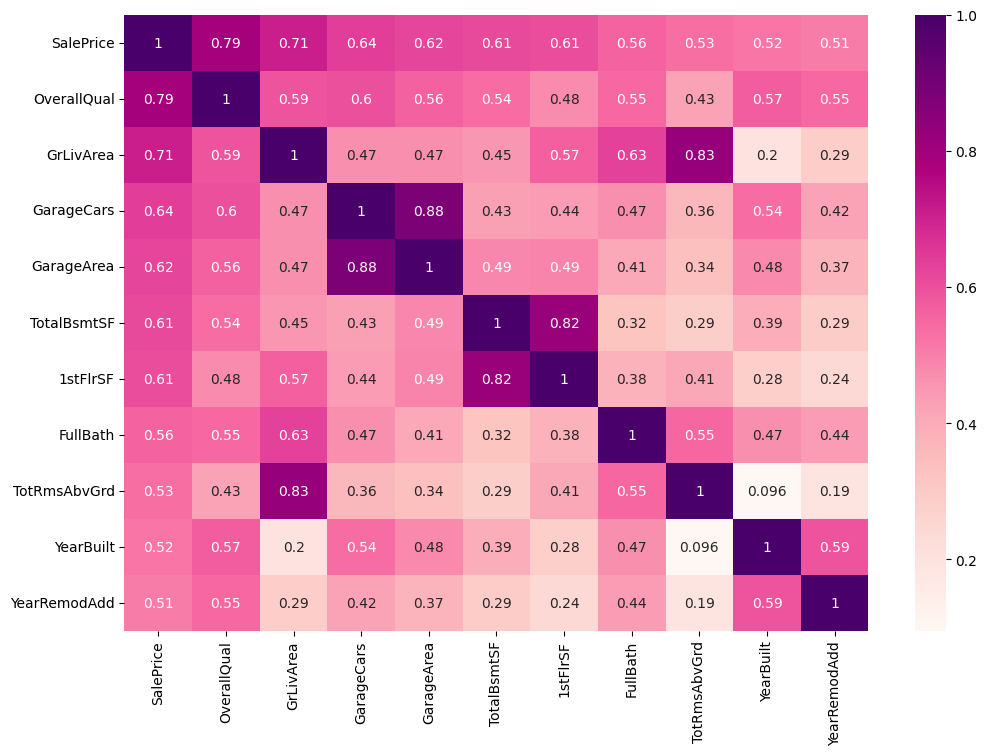

In [11]:
# Selecting the top 10 most positively correlated features with SalePrice
top_corr_features = correlation['SalePrice'].sort_values(ascending=False).head(11).index

# Creating a correlation matrix for the top correlated features
corr_matrix = train_df[top_corr_features].corr()

# Setting up the figure size
plt.figure(figsize=(12, 8))

# Plotting the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='RdPu')

# Displaying the plot
plt.show()


We can observe strong positive correlations between SalePrice and features like OverallQual, GrLivArea, GarageCars, GarageArea, and TotalBsmtSF, as we discussed earlier.

We can also see some correlation between the predictors themselves. For example, GarageCars and GarageArea are highly correlated (0.88), which makes sense - the more cars that fit into a garage, the larger the garage area tends to be. Similarly, GrLivArea and TotRmsAbvGrd have a high correlation (0.83) because houses with more rooms are likely to have a larger living area.

We'll need to consider this multicollinearity, as highly correlated predictors can sometimes negatively impact certain types of regression models. For example, in linear regression, high levels of multicollinearity can cause the coefficients of the predictors to be unstable and difficult to interpret.

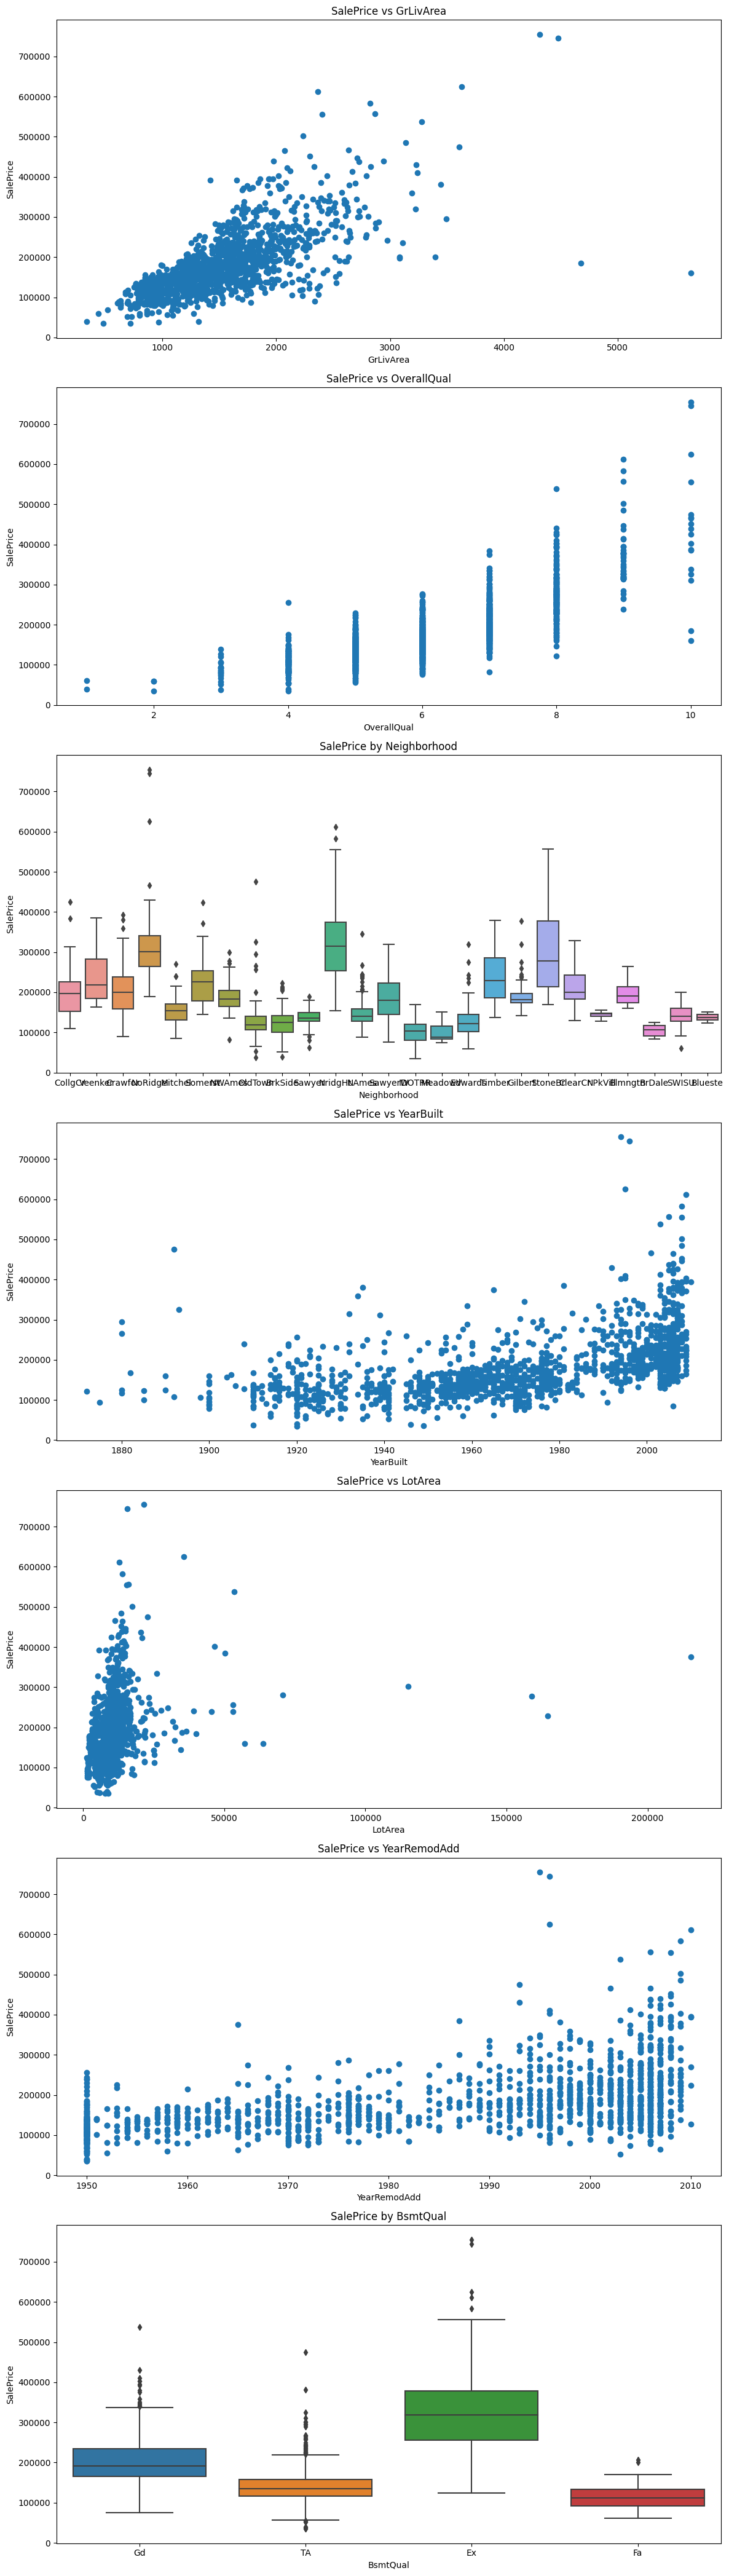

In [12]:

# Variables to explore
vars_to_explore = ['GrLivArea', 'OverallQual', 'Neighborhood', 'YearBuilt', 'LotArea', 'YearRemodAdd', 'BsmtQual']

# Plotting
fig, axs = plt.subplots(nrows=len(vars_to_explore), figsize=(12, 6*len(vars_to_explore)))

for i, var in enumerate(vars_to_explore):
    # Scatter plot for numerical variables
    if train_df[var].dtype in ['int64', 'float64']:
        axs[i].scatter(train_df[var], train_df['SalePrice'])
        axs[i].-set_title(f'SalePrice vs {var}')
        axs[i].set_xlabel(var)
        axs[i].set_ylabel('SalePrice')
    # Box plot for categorical variables
    else:
        sns.boxplot(x=var, y='SalePrice', data=train_df, ax=axs[i])
        axs[i].set_title(f'SalePrice by {var}')
        axs[i].set_xlabel(var)
        axs[i].set_ylabel('SalePrice')

plt.tight_layout()
plt.show()


GrLivArea: As expected, there seems to be a positive correlation between 'GrLivArea' and 'SalePrice'. Larger living areas generally lead to higher sale prices. However, there are a few exceptions (outliers) where large houses sold for relatively low prices. This might indicate that other factors (e.g., the quality of the house, the neighborhood, etc.) can significantly influence the sale price.

OverallQual: The box plots clearly show that the 'SalePrice' increases with 'OverallQual'. The interquartile range (IQR, the range within which the middle 50% of the prices fall) also increases with 'OverallQual'. This suggests that higher quality houses not only sell for higher prices on average, but the price variability is also higher for these houses.

Neighborhood: The sale price appears to vary significantly by neighborhood. Some neighborhoods like 'NoRidge', 'NridgHt', and 'StoneBr' have much higher median prices compared to others. This confirms that location is a crucial factor in determining house prices.

YearBuilt: There seems to be a slight upward trend in prices for more recently built houses, which is expected as newer houses tend to have modern designs and require less maintenance. However, the trend is not very strong, indicating that other factors also play a significant role in determining prices.

LotArea: While there's a general trend of larger lots commanding higher prices, the relationship is not very strong. There are many small lots that sold for high prices, and some large lots that sold for relatively low prices. This might indicate that the utility of a larger lot diminishes after a certain point.

YearRemodAdd: Houses that were remodeled more recently tend to sell for higher prices. This is consistent with the expectation that buyers would pay more for more modern and updated features.

BsmtQual: The sale price seems to increase with the quality of the basement, with 'Ex' (Excellent) basements commanding the highest prices. The variation in price also seems to increase with basement quality.

##  Numeric feature distributions

We look at the distribution, shape, and outliers of the key numeric columns/features. This informs data scaling/normalization and transformation needs later.



Text(0, 0.5, 'Frequency')

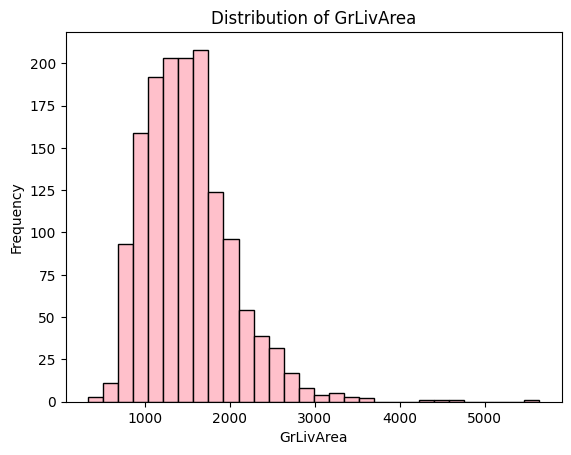

In [13]:
# Histogram for GrLivArea
plt.hist(train_df['GrLivArea'], bins=30, color='pink', edgecolor='black')
plt.title('Distribution of GrLivArea')
plt.xlabel('GrLivArea')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

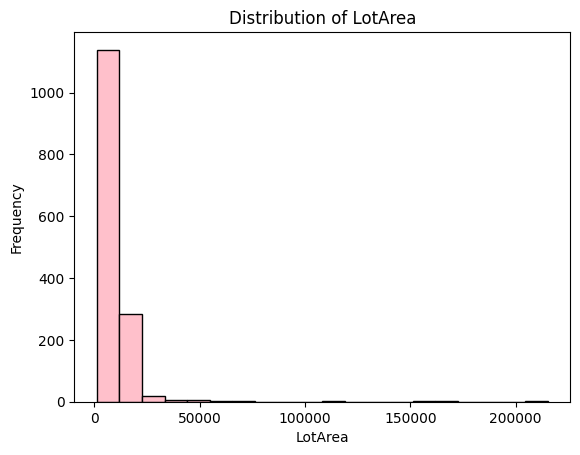

In [14]:
# Histogram for LotArea
plt.hist(train_df['LotArea'], bins=20, color='pink', edgecolor='black')
plt.title('Distribution of LotArea')
plt.xlabel('LotArea')
plt.ylabel('Frequency')

In [15]:
# Summary statistics
print(train_df[['GrLivArea', 'LotArea', '1stFlrSF']].describe())

         GrLivArea        LotArea     1stFlrSF
count  1460.000000    1460.000000  1460.000000
mean   1515.463699   10516.828082  1162.626712
std     525.480383    9981.264932   386.587738
min     334.000000    1300.000000   334.000000
25%    1129.500000    7553.500000   882.000000
50%    1464.000000    9478.500000  1087.000000
75%    1776.750000   11601.500000  1391.250000
max    5642.000000  215245.000000  4692.000000


                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

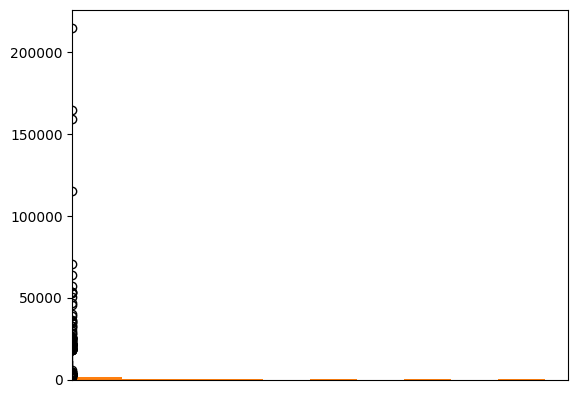

In [16]:
# Histograms
plt.hist(train_df['GrLivArea'])
plt.hist(train_df['LotArea'])

# Boxplots
plt.boxplot(train_df['GrLivArea'])
plt.boxplot(train_df['LotArea'])

# Summary stats
print(train_df.describe())

## Discrete feature analysis

We're looking at features that fall into specific buckets or groups, like number of bedrooms and bathrooms. This is like sorting marbles by color and counting how many of each color there are.

Seeing how many houses have 1 bedroom vs 2 vs 3 etc gives us insights into patterns in the data. We can do this grouping and counting for other categorical features too, like neighborhood or house style.

I thought by creating count plots for the 'Bedrooms' and 'FullBath' features, we can begin to understand the distribution of these discrete features in our dataset. This can provide insights on common trends in the data such as the most common number of bedrooms or bathrooms in a house.


Text(0, 0.5, 'Frequency')

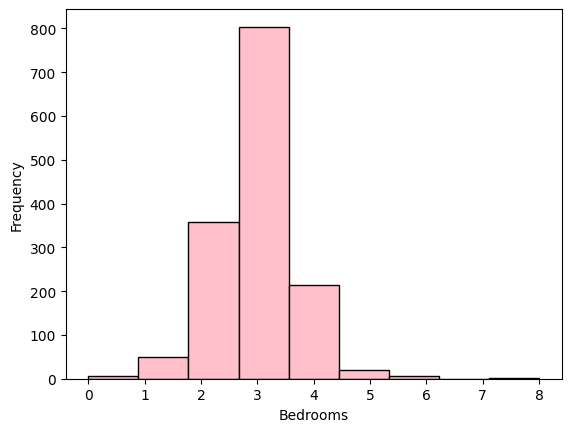

In [17]:
# Bedrooms
plt.hist(train_df['BedroomAbvGr'], bins=9, color='pink', edgecolor='black')
plt.xlabel('Bedrooms')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

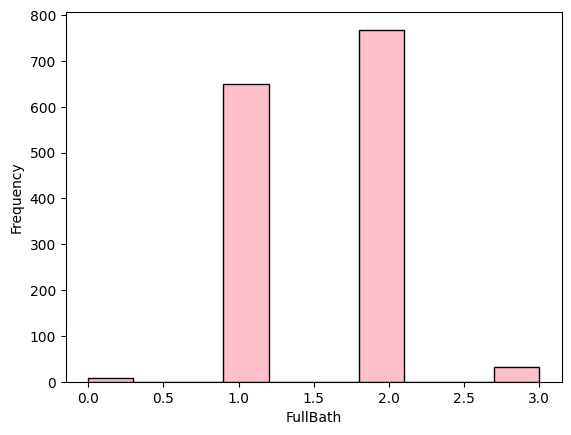

In [18]:
# Full bathrooms
plt.hist(train_df['FullBath'], color='pink', edgecolor='black')  
plt.xlabel('FullBath')
plt.ylabel('Frequency')



### Understanding Zoning

Zoning refers to the local or municipal laws or regulations that dictate how real estate can and cannot be utilized within specific geographic regions. For instance, zoning laws might restrict commercial or industrial land use, ensuring that businesses related to oil, manufacturing, or other industries don't set up their premises in residential neighborhoods.

The 'MSZoning' feature in our dataset signifies the general zoning classification of each property:

- **RL - Residential Low Density**: This category includes properties where the housing density is low, with one unit or a small number of units per building.
- **RM - Residential Medium Density**: This category includes properties with a higher number of units per building compared to low-density residential areas.
- **FV - Floating Village Residential**: This category includes houses that are part of a village grouping with shared open spaces.
- **RH - Residential High Density**: This category includes properties where the housing density is maximized, with the most possible number of units in each building.
- **C (all) - Commercial**: This category includes areas that are intended for commercial business use.

By evaluating the frequency of each unique zoning category in our dataset, we can gain an understanding of the property types and their distributions in our dataset.
The MSZoning feature indicates the general zoning classification of each property such as residential low density (RL) or commercial (C).


We will use The 'value_counts()' function to assess the frequency of each unique category within the 'MSZoning' categorical feature. This can help identify the most common zoning classification for houses in our dataset.




In [19]:
# The value counts printed show the distribution of houses across these zoning types

print('Frequency of values for MSZoning:')
print(train_df['MSZoning'].value_counts())


Frequency of values for MSZoning:
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64


We can see that the majority of houses (1151) are in residential low density areas (RL). There are also a good number (218) in residential medium density (RM) and some in floating village zones (FV). Only a small fraction are in high density (RH) or commercial (C) areas.


In [20]:
# The Neighborhood feature specifies which neighborhood each house belongs to. The value counts show the number of houses in each:

print('\nFrequency of values for Neighborhood:') 
print(train_df['Neighborhood'].value_counts())


Frequency of values for Neighborhood:
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64


NAmes is the largest with 225 houses, while neighborhoods like Veenker only have 11 houses with Blueste having only 2.

## Location Analysis

Exploring the relationships between location features and sale price allows us to explore insights like neighborhood price patterns.


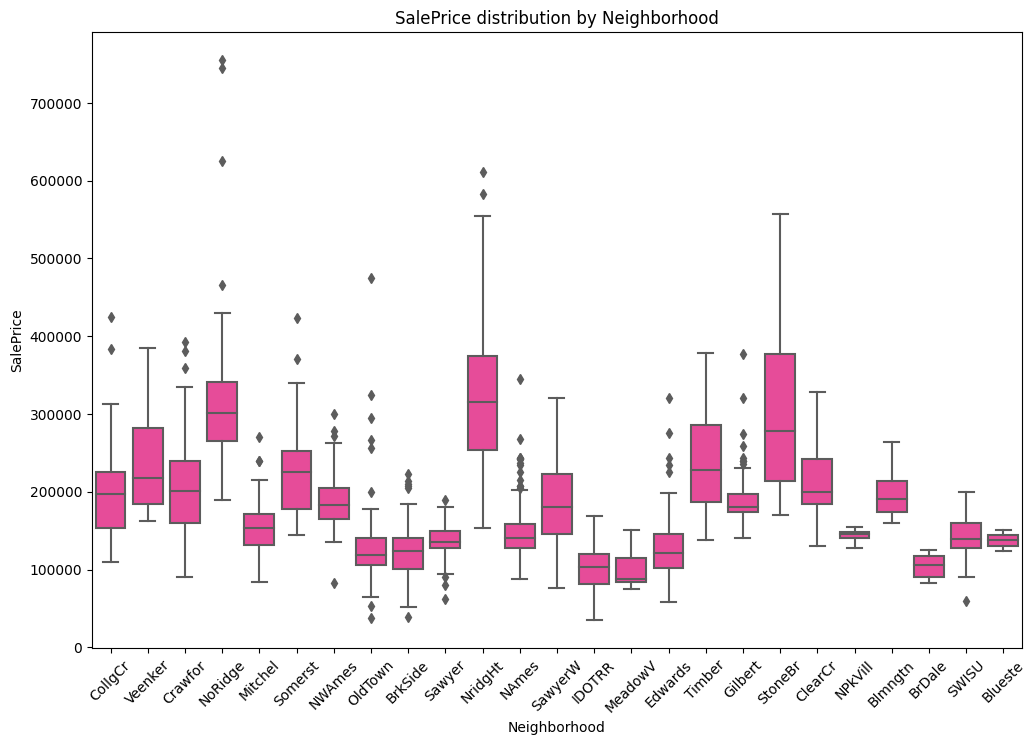

In [21]:
# Location analysis

# Setting up the figure size
plt.figure(figsize=(12, 8))

# Creating a boxplot of Neighborhood and SalePrice

custom_color = (255/255, 51/255, 153/255) # RGB values for a bright pink color
sns.boxplot(x='Neighborhood', y='SalePrice', data=train_df, color=custom_color)

# sns.boxplot(x='Neighborhood', y='SalePrice', data=train_df, color='pink')

# Rotating the x labels for better visibility
plt.xticks(rotation=45)
plt.title('SalePrice distribution by Neighborhood')

# Displaying the plot
plt.show()
